In [1]:
import naskit as nsk

# Parse structure into Nucleic Acid object 

**NucleicAcid** is a key object of naskit package, which contains nucleic acid as a graph.</br>
You can parse nucleic base sequence and DotBracket secondary structure using **NA** function.</br>
**NA** will automatically validate sequence and structure. Additional parameters modify parsing process:

In [2]:
help(nsk.NA)

Help on function NA in module naskit.parse_na:

NA(a: Union[str, naskit.containers.nucleic_acid.NucleicAcid], b: Optional[str] = None, /, *, name: Optional[str] = None, meta: Optional[dict] = None, ignore_unclosed_bonds: bool = False, upper_sequence: bool = False) -> naskit.containers.nucleic_acid.NucleicAcid
    Parse dotbracket strings into NucleicAcid.
    
    :param a: sequence or structure if sequence is not provided.
    :param b: structure if sequence is provided.
    :param name: na name.
    :param meta: dictionary of meta information convertable to string.
    :param ignore_unclosed_bonds: omit single unpaired parentheses without raising error. Default - False.
    :param upper_sequence: upper sequence characters. Default - False.
    
    :return: NucleicAcid object.



In [3]:
# Only sequence
na = nsk.NA('AUUGCGCGUGA', name='seq1')
print(na)

seq1
AUUGCGCGUGA
None


In [4]:
# Only structure
# NA will automaticaly fill sequence with "N"
na = nsk.NA('...((..))..((..))..', name='seq2')
print(na)

seq2
NNNNNNNNNNNNNNNNNNN
...((..))..((..))..


In [5]:
# Full dot bracket
na = nsk.NA('GAAUUCCGGUCGACUCCGGAGAAACAAAGUCAA', 
            '....(((((..[[[.)))))........]]]..', 
            name='bpRNA_PDB_108', 
            meta={'cyclization_energy':2.33456} # dictionary of meta information
           )
print(na)
print(na.meta)

bpRNA_PDB_108
GAAUUCCGGUCGACUCCGGAGAAACAAAGUCAA
....(((((..[[[.)))))........]]]..
{'cyclization_energy': 2.33456}


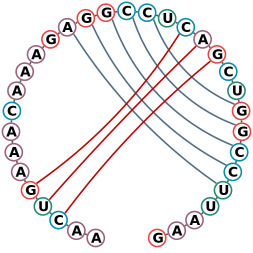

In [7]:
# Jupyter svg representation
from IPython.display import display_svg, SVG
display_svg(SVG(na.draw()))

Get attributes from NA

In [8]:
na.seq

'GAAUUCCGGUCGACUCCGGAGAAACAAAGUCAA'

In [9]:
na.struct

'....(((((..[[[.)))))........]]]..'

## Work with NA graph

In [11]:
na = nsk.NA('AGUUGGACGAACAUUAAACGUCCGGCUAGCCAAAAAAAAAAAAAAACCCAAUAGGC', 
        '..((((..((.[[.)).{{{.]]..((((.}}}..[[..))))..)).]]..))..')
na

AGUUGGACGAACAUUAAACGUCCGGCUAGCCAAAAAAAAAAAAAAACCCAAUAGGC
..((((..((.[[.)).(((.]]..[[[[.)))..{{..]]]]..)).}}..))..

**naskit** can parse structure graph into complementary pairs and helixes

In [13]:
print("All secondary structure pairs:")
print(na.pairs, '\n')

All secondary structure pairs:
((2, 53), (3, 52), (4, 46), (5, 45), (8, 15), (9, 14), (11, 22), (12, 21), (17, 32), (18, 31), (19, 30), (25, 42), (26, 41), (27, 40), (28, 39), (35, 49), (36, 48)) 



In [14]:
print("All secondary structure helixes:")
for h in na.helixes:
    print(h)

All secondary structure helixes:
He-((2, 53), (3, 52))
He-((4, 46), (5, 45))
He-((8, 15), (9, 14))
He-((11, 22), (12, 21))
He-((17, 32), (18, 31), (19, 30))
He-((25, 42), (26, 41), (27, 40), (28, 39))
He-((35, 49), (36, 48))


In [15]:
print("Indexes of knot helixes:")
print(na.knots, '\n')

Indexes of knot helixes:
(3, 5, 6) 



In [16]:
print("Knot helixes orders:")
print(na.helix_orders, '\n')

Knot helixes orders:
(0, 0, 0, 1, 0, 1, 2) 



In [17]:
print("Secondary structure knot pairs:")
print(na.knot_pairs, '\n')

Secondary structure knot pairs:
((11, 22), (12, 21), (25, 42), (26, 41), (27, 40), (28, 39), (35, 49), (36, 48)) 



In [18]:
print("Secondary structure knot helixes:")
for h in na.knot_helixes:
    print(h)

Secondary structure knot helixes:
He-((11, 22), (12, 21))
He-((25, 42), (26, 41), (27, 40), (28, 39))
He-((35, 49), (36, 48))


## Work with adjacency matrix

In [19]:
import matplotlib.pyplot as plt
import numpy as np

Get adjacency from NA

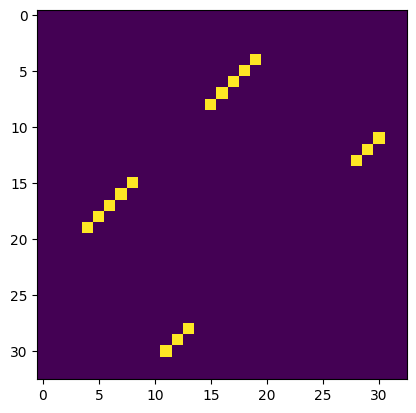

In [20]:
na = nsk.NA('GAAUUCCGGUCGACUCCGGAGAAACAAAGUCAA', 
            '....(((((..[[[.)))))........]]]..')

adj = na.get_adjacency()
plt.imshow(adj)

Create NA from adjacency

In [21]:
na_adj = nsk.NucleicAcid.from_adjacency(adj, seq=na.seq)
print(na_adj)

GAAUUCCGGUCGACUCCGGAGAAACAAAGUCAA
....(((((..[[[.)))))........]]]..


# I/O operations

**naskit** supports reading and writing of the following formats:
- **Fasta** with only sequnce divided into multiple lines by 80 nb
- Extended **DotBracket** with sequence, secondary structure and meta information
- **bpseq**
- **PDB** reading with parsing of secondary structure based on hydrogen bonds energy 

You can easily Read and Write structures using **with** context manager

## DotBracket

In [ ]:
with nsk.dotRead("path", 
                  raise_na_errors=False, # By default DotRead will return None on erroneous structures
                  ignore_unclosed_bonds = False, 
                  upper_sequence = False,
                  meta_separator = ": "
                  ) as f:
    for na in f: # iterate over NucleicAcid objects 
        ...

In [ ]:
na = nsk.NA('GAAUUCCGGUCGACUCCGGAGAAACAAAGUCAA', 
            '....(((((..[[[.)))))........]]]..')

with nsk.dotWrite("path", 
                    append=False, # you can append new structures to file
                    meta_separator = ": "
                   ) as w:
    w.write(na, 
            # By default DotWrite will write structure and meta information
            write_struct = True,
            write_meta = True
           )

## Fasta

In [ ]:
with nsk.fastaRead("path", 
                   raise_na_errors=False, # By default FastaRead will return None on erroneous structures
                   upper_sequence = False
                  ) as f:
    for na in f: # iterate over NucleicAcid objects 
        ...

FastaWrite splits sequence by chunks of 80 characters

In [ ]:
na = nsk.NA('GAAUUCCGGUCGACUCCGGAGAAACAAAGUCAA', 
            '....(((((..[[[.)))))........]]]..')

with nsk.fastaWrite("path", 
                    append=False # By default FastaRead will return None on erroneous structures
                   ) as w:
    w.write(na)

## bpseq

To read individual file

In [ ]:
with nsk.bpseqRead("path", 
                   raise_na_errors = False, 
                   file_as_name = False
                  ) as f:
    na = f.read()

To iterate over files with ".bpseq" format in directory and read them

In [ ]:
with nsk.bpseqDirRead("dir_path", 
                      raise_na_errors = False, 
                      file_as_name = False
                     ) as f:
    for na in f:
        ...

In [ ]:
na = nsk.NA('GAAUUCCGGUCGACUCCGGAGAAACAAAGUCAA', 
            '....(((((..[[[.)))))........]]]..')

with nsk.bpseqWrite("path") as w:
    w.write(na)

## PDB

**naskit** allows to parse pdb file and secondary structure of a nucleic acid.</br>
You can also request pdb from https://www.rcsb.org.</br>
**pdbRead** reader returns **PDBModels** object. If pdb file contains one single model, just take first model by index.

In [4]:
# read from disk
with nsk.pdbRead("../pdbs/1IVS.pdb") as f:
    pdb = f.read(derive_element=True)[0]

In [ ]:
# web request
pdb = nsk.io.request_pdb("1IVS", save_path="../pdbs/1IVS.pdb", derive_element=True)[0]

PDB representation shows you its content and indices of the first compound

In [5]:
pdb

PDB at 0x74e9bbf06100
    [  0] - NucleicAcidChain with 75 NucleicAcidResidue at 0x74e9bbf06140

You can **translate** atom names to a particular "language".</br>
Built-in "amber" and "charmm" force field names are available, default - "amber".</br>

In [6]:
# Translate entire pdb
pdb.translate()

# Translate chain
chain = pdb.na_chains[0]
chain.translate(lang="charmm")

# Translate residue
res = chain[1]
res.translate()

# Translate atom
a = res[0]
a.translate()

If particular atom can not be translated by built-in dictionaries you can provide user dictionary.</br>
User defined name map will have priority in translation.

In [7]:
a.aname = "R"
a

PdbAtom 33 R (G C 1) at 0x74e9c41bce50

In [9]:
a.translate(udict={"R":"Br"})
a

PdbAtom 33 Br (G C 1) at 0x74e9c41bce50

**pdbWrite** can write pdb, chains or individual molecules

In [ ]:
# Write entire pdb
with pdbWrite("path") as w:
    w.write(pdb)

# Write chain
with pdbWrite("path") as w:
    w.write(pdb[0])

# Write molecule
with pdbWrite("path") as w:
    w.write(pdb[6])

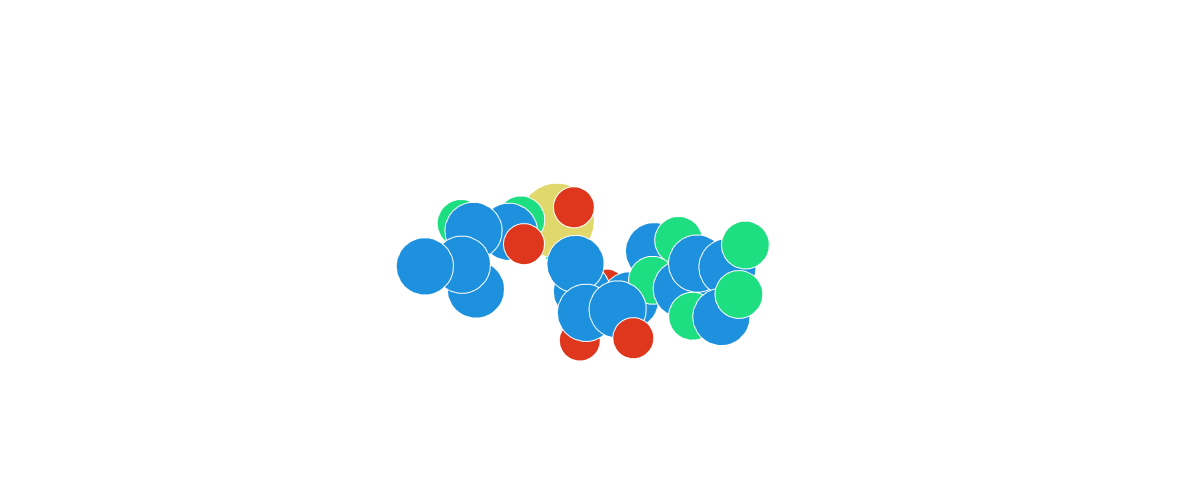

In [41]:
# draw molecule using pyplot
pdb[4].draw(width=500, height=500)

In [42]:
chain = pdb[0]
chain

NucleicAcidChain with 75 NucleicAcidResidue at 0x7fe6b38972c0

You can check type of nucleic acid (RNA or DNA) and convert it. Naskit will swap ribose on deoxyribose and Uracil on Thymine.

In [43]:
print(chain.seq)
print(chain[0].natype)

GGGCGGCUAGCUCAGCGGAAGAGCGCUCGCCUCACACGCGAGAGGUCGUAGGUUCAAGUCCUACGCCGCCCACCA
rna


U


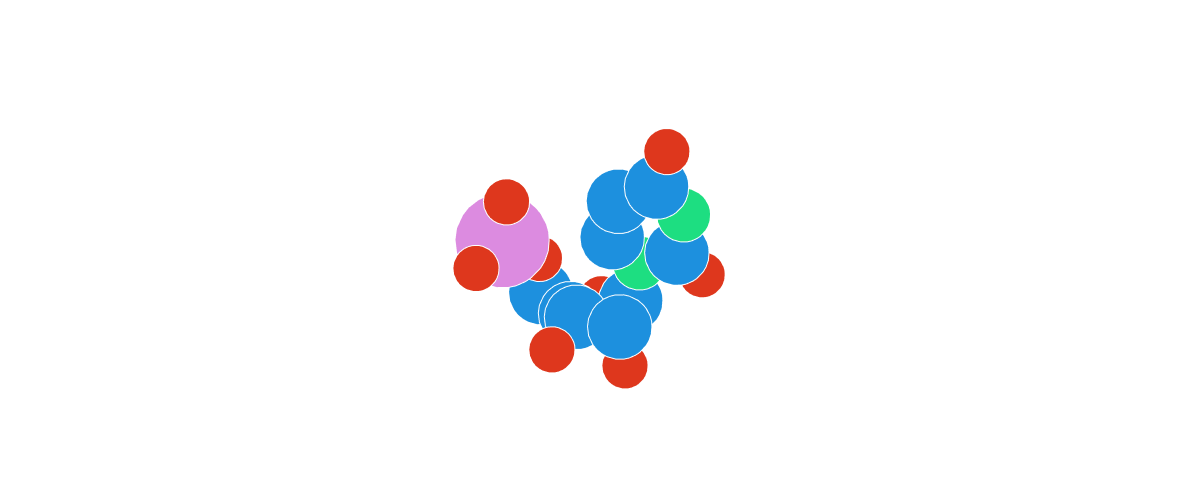

In [45]:
print(chain[7].name)
chain[7].draw(width=500, height=500)

In [47]:
chain.to_dna() # or .to_rna()

In [48]:
print(chain.seq)
print(chain[0].natype)

GGGCGGCTAGCTCAGCGGAAGAGCGCTCGCCTCACACGCGAGAGGTCGTAGGTTCAAGTCCTACGCCGCCCACCA
dna


DT


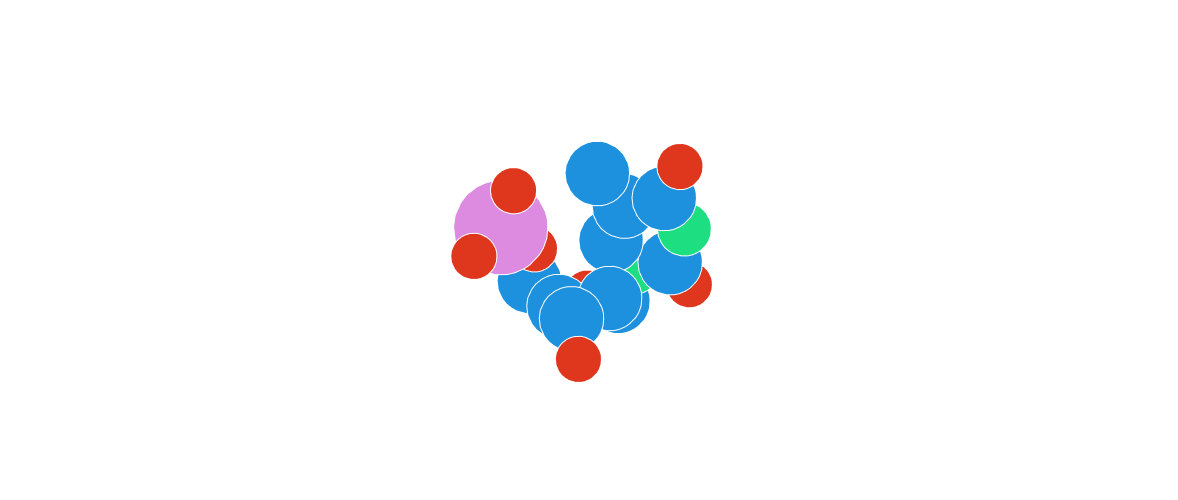

In [49]:
print(chain[7].name)
chain[7].draw(width=500, height=500)